# **Network tracking classifier**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

from joblib import dump

In [2]:
columns = [
    "duration",
    "protocol_type",
    "service",
    "flag",
    "src_bytes",
    "dst_bytes",
    "land",
    "wrong_fragment",
    "urgent",
    "hot",
    "num_failed_logins",
    "logged_in",
    "num_compromised",
    "root_shell",
    "su_attempted",
    "num_root",
    "num_file_creations",
    "num_shells",
    "num_access_files",
    "num_outbound_cmds",
    "is_host_login",
    "is_guest_login",
    "count",
    "srv_count",
    "serror_rate",
    "srv_serror_rate",
    "rerror_rate",
    "srv_rerror_rate",
    "same_srv_rate",
    "diff_srv_rate",
    "srv_diff_host_rate",
    "dst_host_count",
    "dst_host_srv_count",
    "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate",
    "dst_host_srv_serror_rate",
    "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate",
    "outcome",
    "level",
]

data = pd.read_csv(r"data.csv")
data.columns = columns

data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,time,RSTO,0,0,0,0,0,0,...,0.00,0.07,0.00,0.00,0.00,0.0,1.00,1.00,neptune,18
1,0,udp,domain_u,SF,45,139,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,18
2,0,tcp,http,SF,344,4438,0,0,0,0,...,1.00,0.00,0.02,0.02,0.00,0.0,0.00,0.01,normal,21
3,0,udp,private,SF,28,0,0,3,0,0,...,0.18,0.82,0.18,0.00,0.09,0.0,0.73,0.00,teardrop,19
4,0,tcp,http,SF,329,1179,0,0,0,0,...,1.00,0.00,0.06,0.00,0.00,0.0,0.00,0.00,normal,21


In [3]:
print(len(data))

147905


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147905 entries, 0 to 147904
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     147905 non-null  int64  
 1   protocol_type                147905 non-null  object 
 2   service                      147905 non-null  object 
 3   flag                         147905 non-null  object 
 4   src_bytes                    147905 non-null  int64  
 5   dst_bytes                    147905 non-null  int64  
 6   land                         147905 non-null  int64  
 7   wrong_fragment               147905 non-null  int64  
 8   urgent                       147905 non-null  int64  
 9   hot                          147905 non-null  int64  
 10  num_failed_logins            147905 non-null  int64  
 11  logged_in                    147905 non-null  int64  
 12  num_compromised              147905 non-null  int64  
 13 

In [5]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,147905.000000,1.479050e+05,1.479050e+05,147905.000000,147905.000000,147905.000000,147905.000000,147905.000000,147905.000000,147905.000000,...,147905.000000,147905.000000,147905.000000,147905.000000,147905.000000,147905.000000,147905.000000,147905.000000,147905.000000,147905.000000
mean,277.924560,4.038734e+04,1.715858e+04,0.000196,0.020432,0.000203,0.189960,0.004341,0.404307,0.256016,...,119.389750,0.533858,0.084216,0.144211,0.030006,0.256800,0.251966,0.135922,0.136092,19.280653
std,2465.704262,5.420791e+06,3.711179e+06,0.014001,0.240042,0.019457,2.017202,0.072397,0.490759,22.277315,...,111.205104,0.447955,0.194119,0.306495,0.106307,0.428855,0.430085,0.322344,0.334924,2.742570
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.000000,0.590000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.780000e+02,5.800000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.050000,0.010000,0.630000,0.550000,0.000000,0.000000,21.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [6]:
data["outcome"].value_counts()

outcome
normal             76966
neptune            45715
satan               4360
ipsweep             3643
smurf               3108
portsweep           3070
nmap                1566
back                1300
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             901
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  221
snmpgetattack        178
httptunnel           133
buffer_overflow       50
multihop              25
rootkit               23
land                  22
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
ftp_write             11
loadmodule            11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm         

In [7]:
data["outcome"] = data["outcome"].apply(lambda x: 0 if x == "normal" else 1)
data["outcome"].value_counts()

outcome
0    76966
1    70939
Name: count, dtype: int64

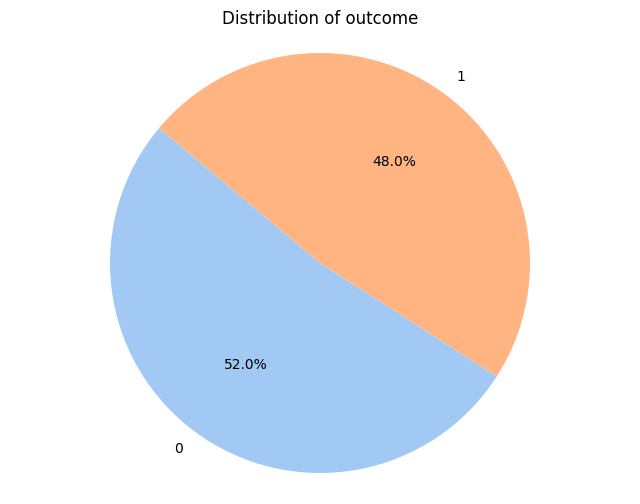

In [8]:
category_counts = data['outcome'].value_counts()

plt.figure(figsize=(8, 6))
colors = sns.color_palette("pastel")
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.title('Distribution of outcome')
plt.show()

In [9]:
def preprocess(data, scaler: preprocessing, train):
    data_copy = data.copy()
    numerical_columns = data_copy.select_dtypes(include=["number"]).columns.tolist()
    categorical_columns = data_copy.select_dtypes(include=["object"]).columns.tolist()

    if train:
        scaled_data = scaler.fit_transform(data_copy[numerical_columns])
    else:
        scaled_data = scaler.transform(data_copy[numerical_columns])

    scaled_data = pd.DataFrame(
        scaled_data,
        columns=numerical_columns,
        index=data_copy.index,
    )

    data_copy[numerical_columns] = scaled_data
    data_copy = pd.get_dummies(data_copy, columns=categorical_columns)

    return data_copy

In [10]:
x = data.drop(columns=["outcome", "level"], axis=1)
y = data["outcome"]
level = data["level"]

In [11]:
x.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,time,RSTO,0,0,0,0,0,0,...,255,1,0.00,0.07,0.00,0.00,0.00,0.0,1.00,1.00
1,0,udp,domain_u,SF,45,139,0,0,0,0,...,255,253,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00
2,0,tcp,http,SF,344,4438,0,0,0,0,...,43,255,1.00,0.00,0.02,0.02,0.00,0.0,0.00,0.01
3,0,udp,private,SF,28,0,0,3,0,0,...,255,47,0.18,0.82,0.18,0.00,0.09,0.0,0.73,0.00
4,0,tcp,http,SF,329,1179,0,0,0,0,...,18,18,1.00,0.00,0.06,0.00,0.00,0.0,0.00,0.00


In [12]:
encoder = preprocessing.OneHotEncoder(handle_unknown="ignore", sparse=False)
scaler = preprocessing.RobustScaler()
preprocessed_data = preprocess(x, encoder, scaler, True)

In [13]:
preprocessed_data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,-0.158273,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,False,False
1,0.0,0.003597,0.239655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,0.0,1.079137,7.651724,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,True,False
3,0.0,-0.057554,0.000000,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,0.0,1.025180,2.032759,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,True,False


In [14]:
pca = PCA(n_components=20)
reducer = pca.fit(preprocessed_data.values)
x_reduced = reducer.transform(preprocessed_data.values)

In [15]:
pd.DataFrame(x_reduced).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-147.737763,-33.822802,-276.139768,-0.212435,-3.696767,-2.489402,-0.384070,0.104908,-0.238717,-0.208781,0.023861,1.838450,-1.343897,0.166556,0.047640,-0.119426,-0.246529,-0.264731,-0.337805,0.099047
1,-147.575890,-33.583246,-276.146706,-0.218932,-3.848372,9.362463,13.946586,4.476784,0.189118,-0.476698,-0.882013,-0.252650,0.192070,0.782439,-0.038850,0.300348,0.220659,0.317544,-0.293009,0.142550
2,-146.499701,-26.172275,-276.268975,-0.207573,-1.602295,-1.612674,1.714308,-1.181465,-0.118402,0.306067,-1.448022,-0.341779,0.266536,-0.636815,-0.013754,0.190697,-0.073351,0.326166,0.088417,0.095855
3,-147.637048,-33.822738,-276.136435,-0.228155,-2.546554,2.705666,-3.077061,4.860559,0.713984,-8.693263,-1.432708,-0.614645,0.413941,1.205907,-0.012644,-0.233581,0.029279,0.661262,1.246450,0.079547
4,-146.554169,-31.790547,-276.181264,-0.212568,-3.256336,-1.606751,-0.261725,-2.086536,-0.159033,0.386562,-1.258976,-0.218797,0.153997,-0.517949,0.022500,0.407009,-0.457196,0.263653,0.130938,0.293739


In [16]:
xtrain, xdev, ytrain, ydev = train_test_split(x_reduced, y, test_size=0.2, random_state=123)
xtrain_reg, xdev_reg, ytrain_reg, ydev_reg = train_test_split(x_reduced, level, test_size=0.2, random_state=123)

In [17]:
classifier = RandomForestClassifier()
classifier.fit(xtrain, ytrain)

RandomForestClassifier()

In [18]:
ypred = classifier.predict(xdev)

accuracy = accuracy_score(ydev, ypred)
precision = precision_score(ydev, ypred, average='binary')
recall = recall_score(ydev, ypred, average='binary') 

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.9944220952638518
Precision: 0.996250442164839
Recall: 0.9921093419754826


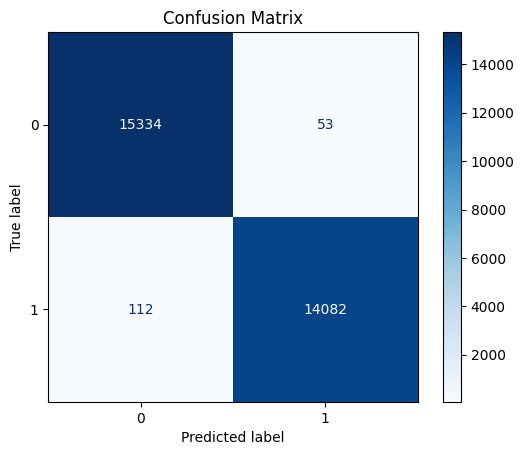

In [19]:
cm = confusion_matrix(ydev, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [21]:
dump(reducer, r"models\pca.joblib")
dump(scaler, r"models\scaler.joblib")
dump(classifier, r"models\random_forest_v1.joblib")
dump(encoder, r"models\one_hot_encoder.joblib")

NameError: name 'encoder' is not defined